In [4]:
import pandas as pd

# Load the Excel file
file_path = r"C:/Users/ktouf/Downloads/Lead_Testing_in_School_Drinking_Water_Sampling_and_Results__Compliance_Period_2023-2025_20250221.xlsx"
xls = pd.ExcelFile(file_path)

# Load the dataset from the correct sheet
lead_df = pd.read_excel(xls, sheet_name='Lead_Testing_in_School_Drinking')

# Handling Missing Values
lead_df = lead_df.assign(
    **{
        'Number of Outlets Sampled 2023': lead_df['Number of Outlets Sampled 2023'].fillna(0),
        'Number of Outlets Sampled 2024': lead_df['Number of Outlets Sampled 2024'].fillna(0),
        'Number of Outlets Sampled 2025': lead_df['Number of Outlets Sampled 2025'].fillna(0),
        'Sampling Complete': lead_df['Sampling Complete'].fillna("Unknown"),
        'All Results Received': lead_df['All Results Received'].fillna("Unknown"),
        'Out of Service or Addressed': lead_df['Out of Service or Addressed'].fillna("Unknown"),
        'Remediation Status': lead_df['Remediation Status'].fillna("Unknown")
    }
)

# Standardizing Text Fields
lead_df['County'] = lead_df['County'].str.strip().str.title()
lead_df['School District'] = lead_df['School District'].str.strip().str.title()
lead_df['School'] = lead_df['School'].str.strip().str.title()

# Convert Date Field to Proper Format
lead_df['Date Survey Updated'] = pd.to_datetime(lead_df['Date Survey Updated'], errors='coerce')

# Display Dataset Info After Cleaning
lead_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Compliance Period                        1942 non-null   object        
 1   School District                          1942 non-null   object        
 2   School                                   1942 non-null   object        
 3   County                                   1942 non-null   object        
 4   Type of Organization                     1942 non-null   object        
 5   BEDS Code                                1942 non-null   object        
 6   School Website                           1928 non-null   object        
 7   Number of Outlets that Require Sampling  1931 non-null   float64       
 8   Number of Outlets Sampled 2023           1942 non-null   float64       
 9   Number of Outlets Sampled 2024           

In [2]:
print(lead_df.columns)

Index(['Compliance Period', 'School District', 'School', 'County',
       'Type of Organization', 'BEDS Code', 'School Website',
       'Number of Outlets that Require Sampling',
       'Number of Outlets Sampled 2023', 'Number of Outlets Sampled 2024',
       'Number of Outlets Sampled 2025', 'Sampling Complete',
       'Number of Outlets, Result ≤ 5 ppb',
       'Number of Outlets, Result > 5 ppb', 'All Results Received',
       'Out of Service or Addressed', 'Remediation Status', 'School Street',
       'School City', 'School State', 'School ZIP Code', 'Date Survey Updated',
       'County Location', 'Location'],
      dtype='object')


In [20]:
# Identifying high-risk schools (schools with outlets > 5 ppb)
high_risk_schools = lead_df[lead_df['Number of Outlets, Result > 5 ppb'] >0]

# Count high-risk schools by county
high_risk_county = high_risk_schools.groupby('County')['School'].count().reset_index()
high_risk_county.columns = ['County', 'High-Risk Schools']


In [21]:
high_risk_county.head(50)

,County,High-Risk Schools
0,Albany,25
1,Allegany,1
2,Bronx,59
3,Brooklyn,4
4,Broome,8
5,Cattaraugus,11
6,Chautauqua,4
7,Clinton,5
8,Columbia,3
9,Dutchess,9


In [10]:
import matplotlib.pyplot as plt

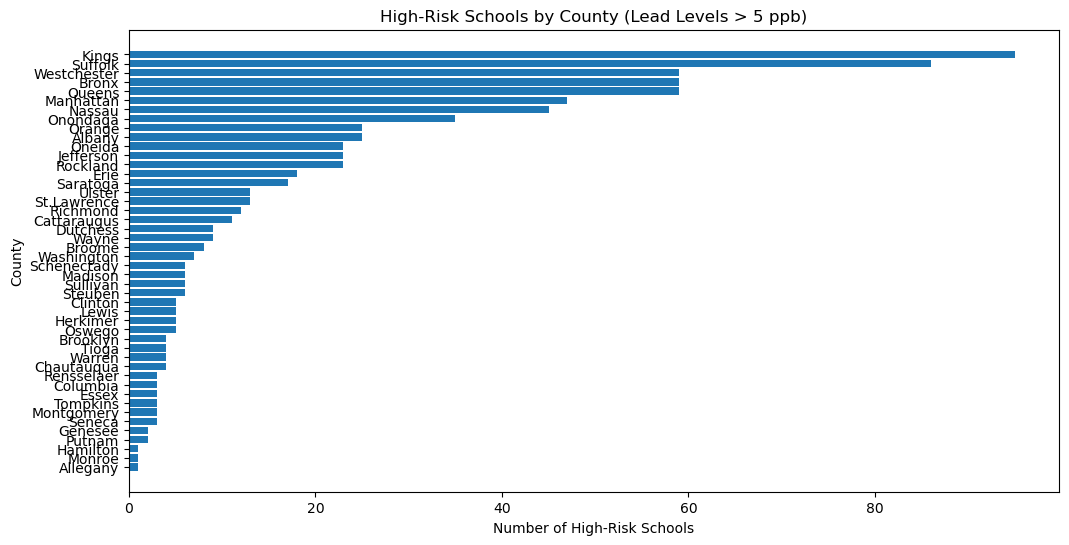

In [11]:
import matplotlib.pyplot as plt

# Sorting the data by number of high-risk schools in descending order
high_risk_county = high_risk_county.sort_values(by="High-Risk Schools", ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(high_risk_county["County"], high_risk_county["High-Risk Schools"])
plt.xlabel("Number of High-Risk Schools")
plt.ylabel("County")
plt.title("High-Risk Schools by County (Lead Levels > 5 ppb)")
plt.gca().invert_yaxis()  # Invert y-axis to show highest on top

# Show the plot
plt.show()


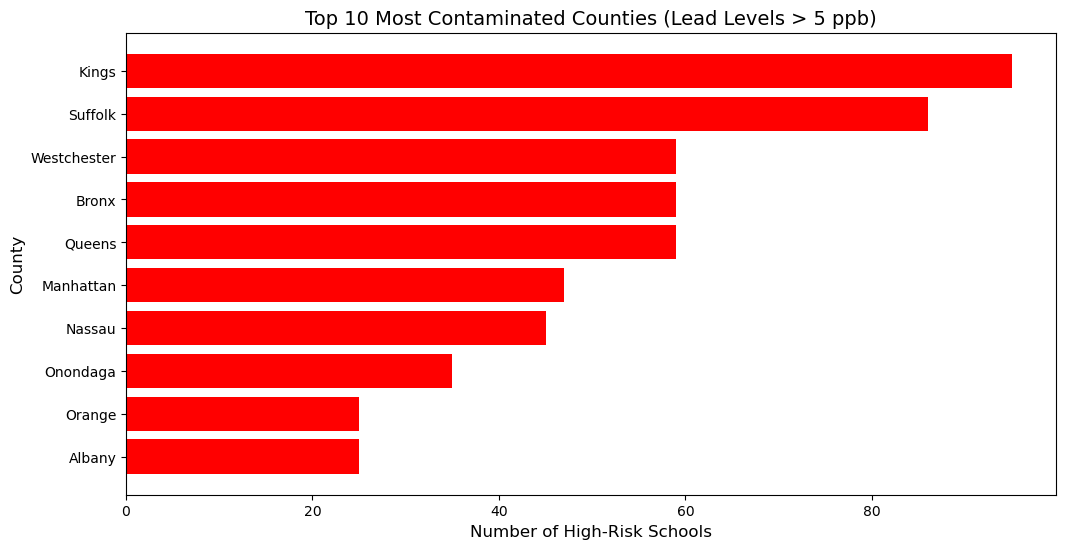

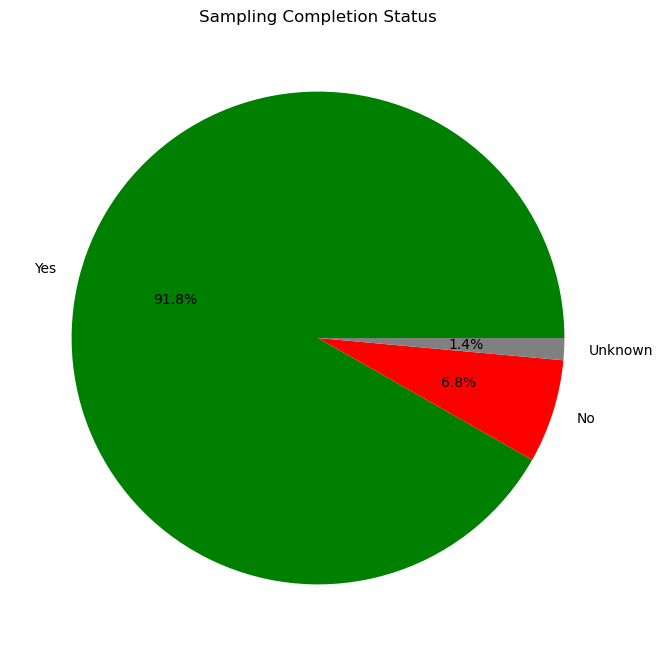

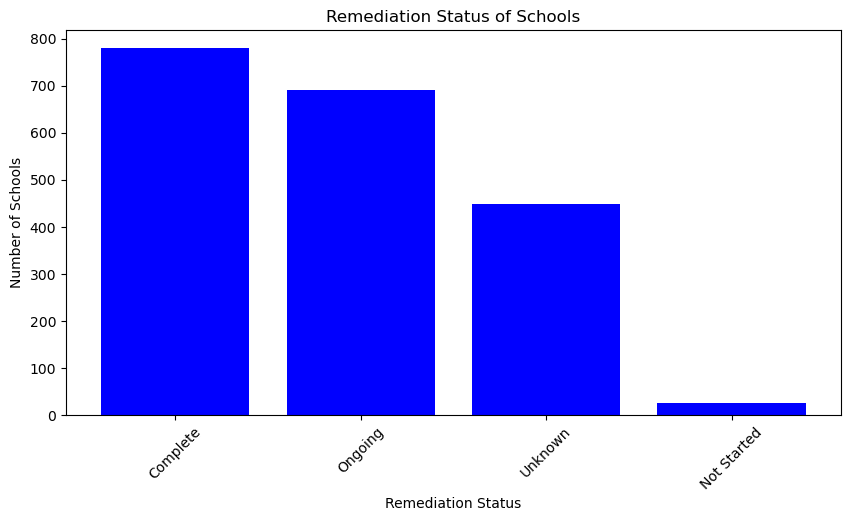

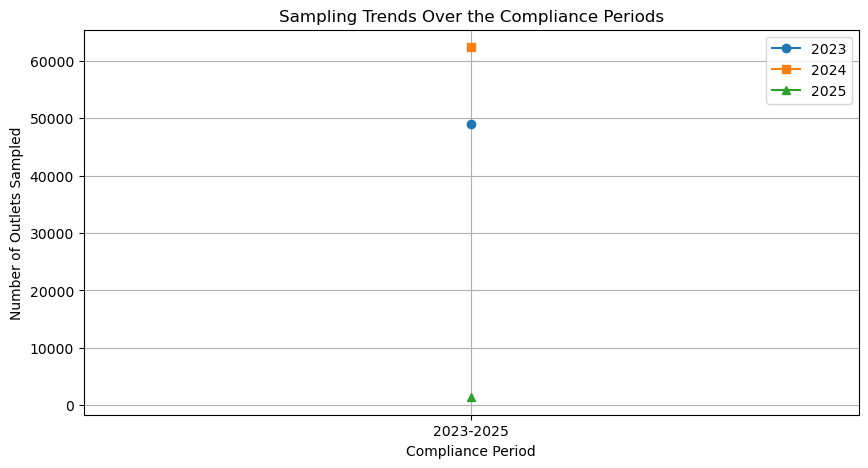

In [23]:
import matplotlib.pyplot as plt

# Standardizing column names by stripping whitespace
lead_df.columns = lead_df.columns.str.strip()

# Correcting column name issue (removing special characters like non-breaking spaces)
lead_df.rename(columns={
    'Number of Outlets, Result > 5 ppb': 'Number of Outlets, Result > 5 ppb'
}, inplace=True)

# Handling Missing Values
lead_df = lead_df.assign(
    **{
        'Number of Outlets Sampled 2023': lead_df['Number of Outlets Sampled 2023'].fillna(0),
        'Number of Outlets Sampled 2024': lead_df['Number of Outlets Sampled 2024'].fillna(0),
        'Number of Outlets Sampled 2025': lead_df['Number of Outlets Sampled 2025'].fillna(0),
        'Sampling Complete': lead_df['Sampling Complete'].fillna("Unknown"),
        'All Results Received': lead_df['All Results Received'].fillna("Unknown"),
        'Out of Service or Addressed': lead_df['Out of Service or Addressed'].fillna("Unknown"),
        'Remediation Status': lead_df['Remediation Status'].fillna("Unknown")
    }
)

# Standardizing Text Fields
lead_df['County'] = lead_df['County'].str.strip().str.title()
lead_df['School District'] = lead_df['School District'].str.strip().str.title()
lead_df['School'] = lead_df['School'].str.strip().str.title()

# Convert Date Field to Proper Format
lead_df['Date Survey Updated'] = pd.to_datetime(lead_df['Date Survey Updated'], errors='coerce')

# Identifying high-risk schools (schools with outlets > 5 ppb)
high_risk_schools = lead_df[lead_df['Number of Outlets, Result > 5 ppb'] > 0]

# Count high-risk schools by county
high_risk_county = high_risk_schools.groupby('County')['School'].count().reset_index()
high_risk_county.columns = ['County', 'High-Risk Schools']

# Sorting the data and selecting the top 10
top_10_high_risk_county = high_risk_county.sort_values(by="High-Risk Schools", ascending=False).head(10)

# Plotting the improved bar chart for top 10 high-risk counties
plt.figure(figsize=(12, 6))
plt.barh(top_10_high_risk_county["County"], top_10_high_risk_county["High-Risk Schools"], color='red')
plt.xlabel("Number of High-Risk Schools", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.title("Top 10 Most Contaminated Counties (Lead Levels > 5 ppb)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()  # Invert y-axis to show highest on top

# Show the plot
plt.show()

# Additional Visualizations

# 1. Pie chart for Sampling Completion Status
sampling_status = lead_df['Sampling Complete'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sampling_status, labels=sampling_status.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Sampling Completion Status")
plt.show()

# 2. Bar chart for Remediation Status
remediation_status = lead_df['Remediation Status'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(remediation_status.index, remediation_status.values, color='blue')
plt.xlabel("Remediation Status")
plt.ylabel("Number of Schools")
plt.title("Remediation Status of Schools")
plt.xticks(rotation=45)
plt.show()

# 3. Line Chart for Sampling Trends Over Years
sampling_trends = lead_df.groupby("Compliance Period")[["Number of Outlets Sampled 2023", "Number of Outlets Sampled 2024", "Number of Outlets Sampled 2025"]].sum()

plt.figure(figsize=(10, 5))
plt.plot(sampling_trends.index, sampling_trends["Number of Outlets Sampled 2023"], marker='o', linestyle='-', label="2023")
plt.plot(sampling_trends.index, sampling_trends["Number of Outlets Sampled 2024"], marker='s', linestyle='-', label="2024")
plt.plot(sampling_trends.index, sampling_trends["Number of Outlets Sampled 2025"], marker='^', linestyle='-', label="2025")

plt.xlabel("Compliance Period")
plt.ylabel("Number of Outlets Sampled")
plt.title("Sampling Trends Over the Compliance Periods")
plt.legend()
plt.grid(True)
plt.show()


Top 10 Most Contaminated Counties (Bar Chart)

Shows counties with the highest number of schools exceeding lead levels > 5 ppb.
Helps identify areas that need the most urgent intervention.
Sampling Completion Status (Pie Chart)

Displays the proportion of schools that have completed sampling.
Highlights schools that haven’t completed testing.
Remediation Status of Schools (Bar Chart)

Shows how many schools have addressed lead contamination.
Differentiates between Complete, Ongoing, and Unknown remediation statuses.
Sampling Trends Over Compliance Periods (Line Chart)

Tracks the number of outlets sampled in 2023, 2024, and 2025.
Provides insights into how lead testing efforts are progressing over time.

